# The First Circle: Previously On Nine Circles, Part One 
## Linear regression

<br/>
Jiří Fejlek

2025-11-26
<br/>

In the first circle, we will quickly go through statistical models used in machine learning that we already covered in Nine Circles of Statistical Modeling (<https://github.com/fejlek/Nine-Circles-Statistics>). We will use the same datasets, so there will be nothing new in the content itself. However, the implementation will be performed in *Python* (which we will use in this series) rather than *R*. My personal motivation is to *learn* Python, and I think the best place to start is to go back and revisit the datasets I already investigated using the tools in *R*. Consequently, I can easily check that I am doing things right (or doing them wrong again in the same way). We can also investigate whether the capabilities of Python packages are comparable to those in R.

Our brief revisit starts with linear regression and the life expectancy dataset (<https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated>), which consists of health, immunization, and economic and demographic data about 179 countries.<br/>

## Table of Contents

- [Life Expectancy (WHO) Dataset](#life-expectancy-who-dataset)
- [Initial Linear Regression Model](#initial-linear-regression-model)
    - [Fit and Diagnostics](#fit-and-diagnostics)
    - [Dealing with Heteroskedasticity](#heteroskedasticity)
    - [Dealing with Autocorrelation](#autocorrelation)
- [Fixed and Random Effects Models](#fixed-and-random)
- [Confidence Intervals for Predictions](#predictions)
- [Model Validation](#validation)
- [References](#references)

## Life Expectancy (WHO) Dataset <a class="anchor" id="life-expectancy-who-dataset"></a>

The dataset contains the following data.

- **Country**
- **Region**
- **Year** - Data observed from 2000 to 2015
- **Infant_deaths** - Infant deaths per 1000 population
- **Under_five_deaths** - Deaths of children under five years old per 1000 population
- **Adult_mortality** - Deaths of adults between 15 and 60 per 1000 population
- **Alcohol_consumption** - Alcohol consumption in liters of pure alcohol per capita for 15+ years old
- **Hepatitis_B** - Coverage (%) of Hepatitis B (HepB3) immunization among 1-year-olds.
- **Measles** - Coverage (%) of Measles immunization among 1-year-olds
- **BMI** - Mean body mass index (BMI) of adult population 18+
- **Polio** - Coverage (%) of Polio (Pol3) immunization among 1-year-olds
- **Diptheria** - Coverage (%) of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
- **Incidents_HIV** - Incidents of HIV per 1000 population aged 15-49
- **GDP_per_capita** - GDP per capita in USD
- **Population_mln** - Total population in millions
- **Thinness_10-19** - Prevalence of thinness among adolescents aged 10-19 years: BMI \< -2 standard deviations below the median
- **Thinness_5-9** - Prevalence of thinness among children aged 5-9 years: BMI \< -2 standard deviations below the median
- **Schooling** - Average years that people aged 25+ spent in formal education
- **Developed** - Economically developed country (status in the World Trade Organization)
- **Developing** - Economically developing country (status in the World Trade Organization)
- **Life_expectancy** - Average life expectancy


<br/> Let us load the dataset and check the types.

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25') # more readable numerical outputs 

In [2]:
life_expectancy = pd.read_csv('C:/Users/elini/Desktop/nine circles 2/Life-Expectancy-Data-Updated.csv')
life_expectancy

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [3]:
life_expectancy.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

<br/> First, we perform some data cleaning.

In [4]:
# drop redundant column
life_expectancy = life_expectancy.drop('Economy_status_Developing', axis=1)
# turn column into factor and rename the column
life_expectancy = life_expectancy.rename(columns={'Economy_status_Developed': 'Economy_status'})
life_expectancy['Economy_status'] = life_expectancy['Economy_status'].astype(object)
# rename levels
life_expectancy.loc[life_expectancy['Economy_status'] == 0,'Economy_status'] = 'Developing'
life_expectancy.loc[life_expectancy['Economy_status'] == 1,'Economy_status'] = 'Developed'

<br/> Check for missing values and duplicated rows.

In [5]:
life_expectancy.isna().any(axis = None)

False

In [6]:
life_expectancy.duplicated(keep = False).any(axis = None)

False

<br/>Next, we check the predictors. For numerical predictors, we can get the basic descriptive statistics as follows.

In [7]:
from scipy import stats

stats.describe(life_expectancy['Infant_deaths'], axis = 0)

DescribeResult(nobs=2864, minmax=(1.8, 138.1), mean=30.36379189944134, variance=758.3478642053692, skewness=1.1035440527966804, kurtosis=0.3895217049700759)

<br/> Let us print a more transparent table of descriptive statistics for all numerical predictors (à la *summary* from R).

In [8]:
numeric_variables = list(life_expectancy)[3:18]
numeric_basic_stats = np.zeros([len(numeric_variables),6])

for i in range(len(numeric_variables)):
    numeric_basic_stats[i,0] = np.mean(life_expectancy[numeric_variables[i]])
    numeric_basic_stats[i,1] = np.median(life_expectancy[numeric_variables[i]])
    numeric_basic_stats[i,2] = np.min(life_expectancy[numeric_variables[i]])
    numeric_basic_stats[i,3] = np.quantile(life_expectancy[numeric_variables[i]], 0.25)
    numeric_basic_stats[i,4] = np.quantile(life_expectancy[numeric_variables[i]], 0.75)
    numeric_basic_stats[i,5] = np.max(life_expectancy[numeric_variables[i]])
  
pd.DataFrame(data=numeric_basic_stats, index=numeric_variables, columns=['mean','median','min','1st qrt.','3rd qrt.','max'])

,mean,median,min,1st qrt.,3rd qrt.,max
Infant_deaths,30.363792,19.6000,1.800,8.10000,47.350000,138.1000
Under_five_deaths,42.938268,23.1000,2.300,9.67500,66.000000,224.9000
Adult_mortality,192.251775,163.8415,49.384,106.91025,246.791375,719.3605
Alcohol_consumption,4.820882,4.0200,0.000,1.20000,7.777500,17.8700
Hepatitis_B,84.292598,89.0000,12.000,78.00000,96.000000,99.0000
Measles,77.344972,83.0000,10.000,64.00000,93.000000,99.0000
BMI,25.032926,25.5000,19.800,23.20000,26.400000,32.1000
Polio,86.499651,93.0000,8.000,81.00000,97.000000,99.0000
Diphtheria,86.271648,93.0000,16.000,81.00000,97.000000,99.0000
Incidents_HIV,0.894288,0.1500,0.010,0.08000,0.460000,21.6800


<br/> The distributions are easier to assess via histograms.

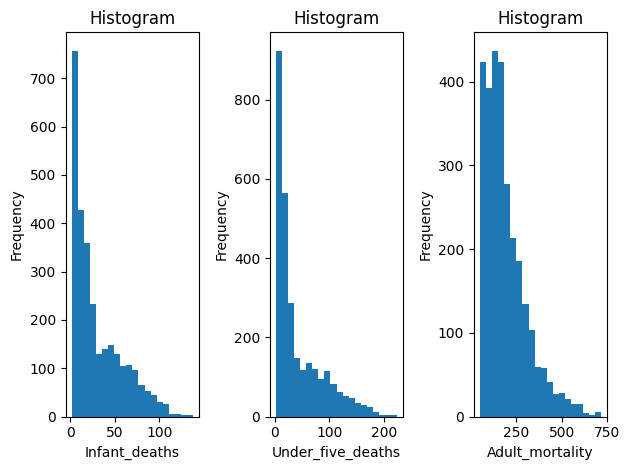

In [9]:
import matplotlib.pyplot as plt

f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(life_expectancy[numeric_variables[idx]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables[idx])
    ax.set_ylabel('Frequency')
plt.tight_layout()

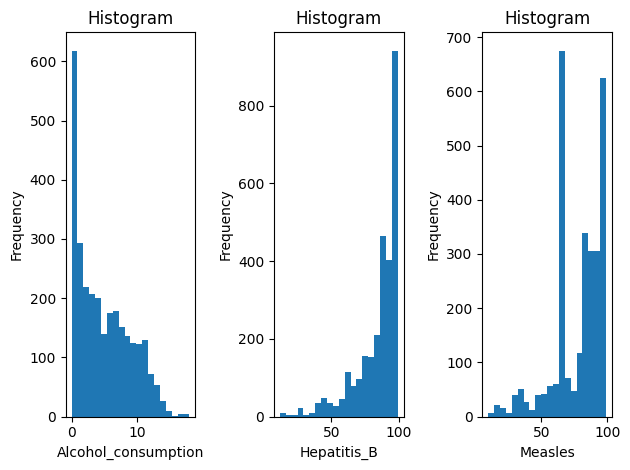

In [10]:
f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(life_expectancy[numeric_variables[idx+3]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables[idx+3])
    ax.set_ylabel('Frequency')
plt.tight_layout()

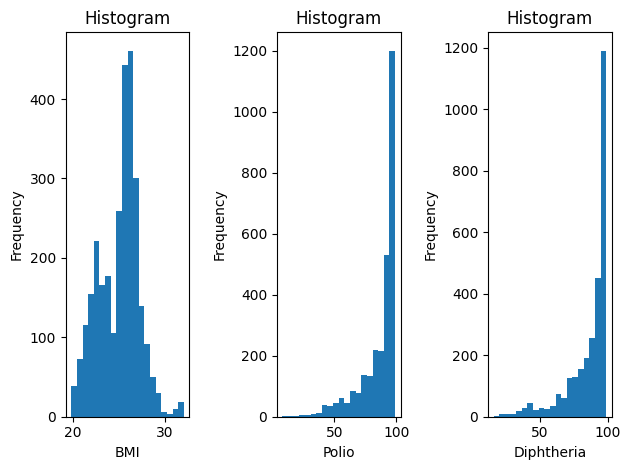

In [11]:
f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(life_expectancy[numeric_variables[idx+6]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables[idx+6])
    ax.set_ylabel('Frequency')
plt.tight_layout()

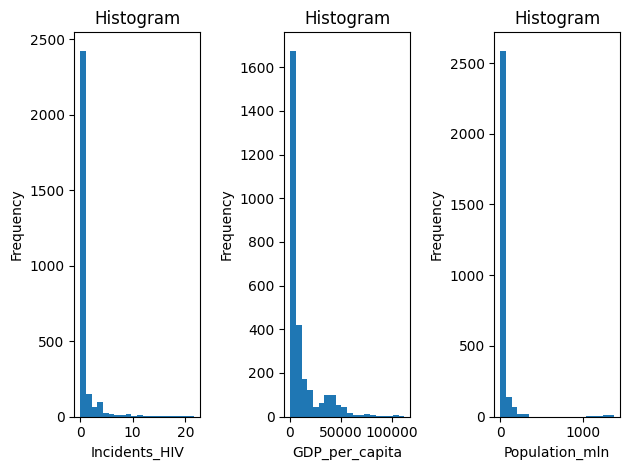

In [12]:
f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(life_expectancy[numeric_variables[idx+9]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables[idx+9])
    ax.set_ylabel('Frequency')
plt.tight_layout()

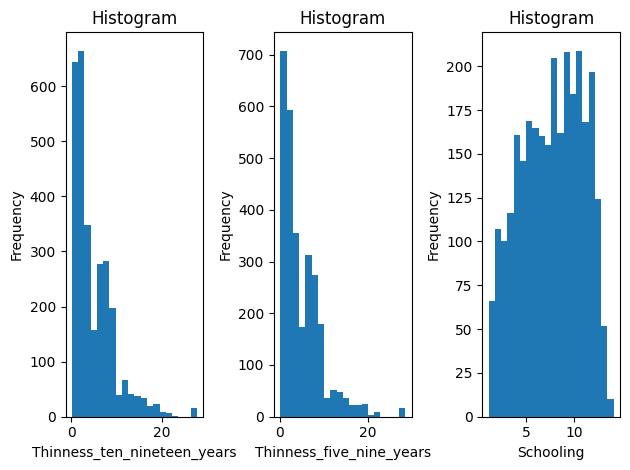

In [13]:
f,a = plt.subplots(1,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(life_expectancy[numeric_variables[idx+12]], bins=20)
    ax.set_title('Histogram')
    ax.set_xlabel(numeric_variables[idx+12])
    ax.set_ylabel('Frequency')
plt.tight_layout()

<br/> The distributions of **Population_mln** and **GDP_per_capita** are significantly skewed, and thus, we will use the logarithm transformation to reduce their spread.

In [14]:
life_expectancy['GDP_log'] = np.log(life_expectancy['GDP_per_capita'])
life_expectancy['Pop_log'] = np.log(life_expectancy['Population_mln']+1)

<br/> Let us check the categorical predictors next.

In [15]:
life_expectancy['Region'].value_counts()

Region
Africa                           816
Asia                             432
European Union                   432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: count, dtype: int64

In [16]:
life_expectancy['Economy_status'].value_counts()

Economy_status
Developing    2272
Developed      592
Name: count, dtype: int64

<br/> As the last step, we will investigate the redundancy of variables via the variance inflation factor (VIF). We should note that in Python, we need to specify the whole design matrix, i.e., replace factors with dummy variables and add an intercept. As we will discuss in the next section, our model of life expectancy will contain as the main predictors of interest all predictors except **Country**, **Year**, and **Adult_mortality**. Hence, we exclude them from the design matrix.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

ind = [*range(3,5),*range(6,13),*range(15,18),*range(20,22)] # extract relevant continous predictors
ind = [list(life_expectancy)[x] for x in ind]

VIF_dataframe = life_expectancy[ind].copy()
VIF_dataframe['Economy_status'] = (life_expectancy['Economy_status'] == 'Developing').astype(int) # add dummy variable for 'Economy_status'
VIF_dataframe = VIF_dataframe.assign(const=1) # add intercept!

VIF_vals = [VIF(VIF_dataframe, i) 
        for i in range(0, VIF_dataframe.shape[1]-1)]
VIF_vals = pd.DataFrame({'VIF':VIF_vals},index=VIF_dataframe.columns[0:15])
VIF_vals


,VIF
Infant_deaths,45.496298
Under_five_deaths,43.384616
Alcohol_consumption,2.266525
Hepatitis_B,2.618636
Measles,1.622987
BMI,2.918694
Polio,12.154609
Diphtheria,13.065068
Incidents_HIV,1.350231
Thinness_ten_nineteen_years,8.894234


<br/> We notice that **Infant_deaths** and **Under_five_deaths** are highly correlated, since **Under_five_deaths** also include **Infant_deaths**. We can easily solve thiss issue by considering **Infant_deaths** and **Under_five_deaths - Infant_deaths**.

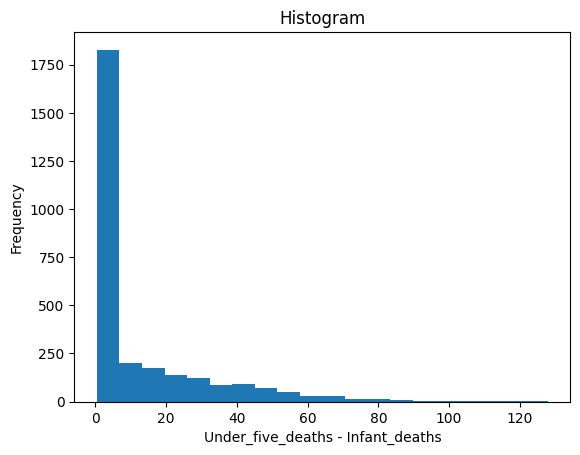

In [18]:
plt.hist((life_expectancy['Under_five_deaths']-life_expectancy['Infant_deaths']), bins=20)
plt.title('Histogram')
plt.xlabel('Under_five_deaths - Infant_deaths')
plt.ylabel('Frequency');

In [19]:
life_expectancy['Child_deaths'] = life_expectancy['Under_five_deaths']-life_expectancy['Infant_deaths']

## Initial Linear Regression Model <a class="anchor" id="initial-linear-regression-model"></a>

Let us start the modelling. As we mentioned earlier, we will not include **Adult_mortality** in the model, because it can explain **Life_expectancy** almost by itself.

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # with statsmodels.formula.api we can use formulas fairly simmilar to R

adm_fit = smf.ols(formula='Life_expectancy ~ Adult_mortality', data=life_expectancy) 
print(adm_fit.fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.406e+04
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:57:20   Log-Likelihood:                -7272.5
No. Observations:                2864   AIC:                         1.455e+04
Df Residuals:                    2862   BIC:                         1.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.7324      0.112    7

<br/> We observe that the model already explains about 90% variability in the data (by looking at the *R-squared* statistics). Consequently, let us explore other predictors and models that provide explanations beyond the fact that, in low **Life_expectancy** countries, more people tend to die young (before reaching 60).

### Fit and Diagnostics <a class="anchor" id="fit-and-diagnostics"></a>

Now, our data are so-called panel data; they consist of information on individual countries for the years 2000-2015. But for starters, let us ignore both **Country** and **Year** variables and stack all the data together, creating a *pooled* model [[1](#1),[2](#2)].

In [21]:
lm_pooled = smf.ols(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths', data=life_expectancy)

print(lm_pooled.fit().summary())  

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2154.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:57:20   Log-Likelihood:                -6308.4
No. Observations:                2864   AIC:                         1.266e+04
Df Residuals:                    2840   BIC:                         1.281e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<br/> Let us check the residuals.

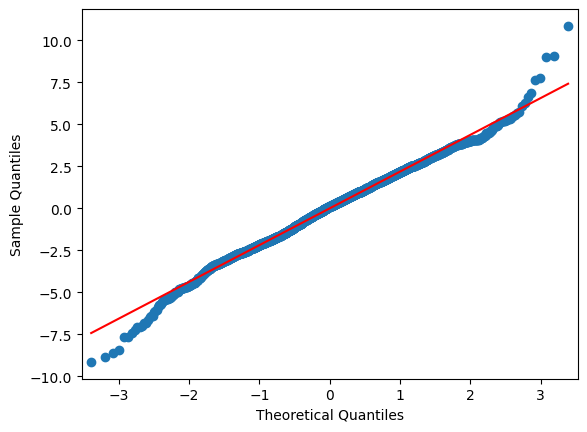

In [22]:
sm.qqplot(lm_pooled.fit().resid, line='s');

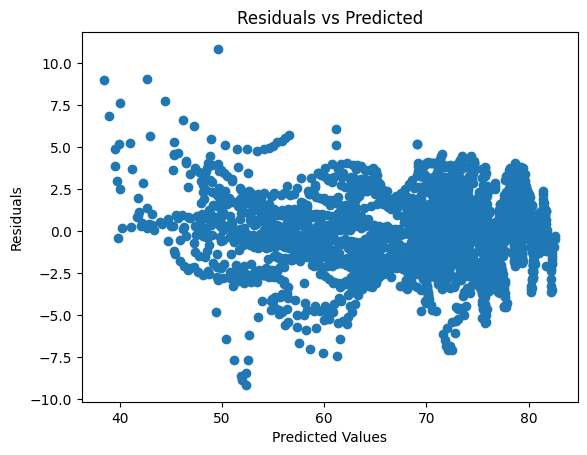

In [23]:
plt.scatter(lm_pooled.fit().fittedvalues, lm_pooled.fit().resid)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

<br/> We can also plot the residuals against the predictors. Here are some examples

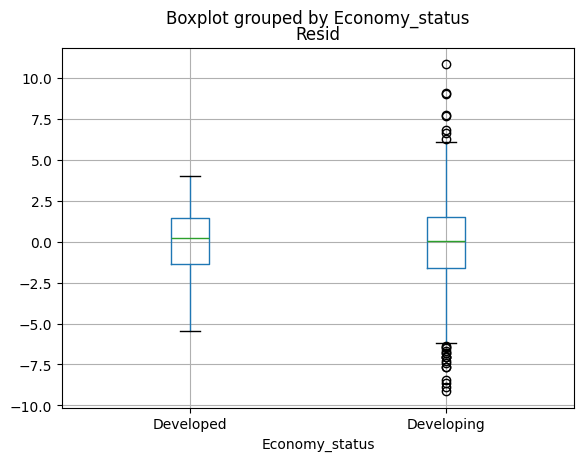

In [24]:
boxplotresid_dataframe = pd.DataFrame({'Resid':lm_pooled.fit().resid, \
                                       'Economy_status':life_expectancy['Economy_status'],
                                       'Region':life_expectancy['Region'],})
boxplotresid_dataframe.boxplot('Resid',by='Economy_status');

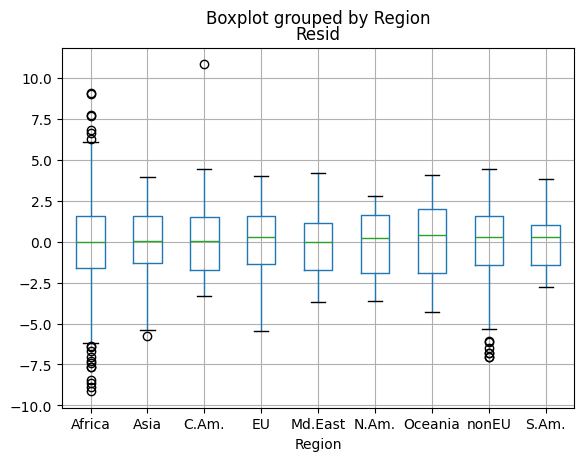

In [25]:
boxplotresid_dataframe.boxplot('Resid',by='Region')
plt.xticks([1,2,3,4,5,6,7,8,9], ['Africa','Asia','C.Am.','EU','Md.East','N.Am.','Oceania','nonEU','S.Am.']);

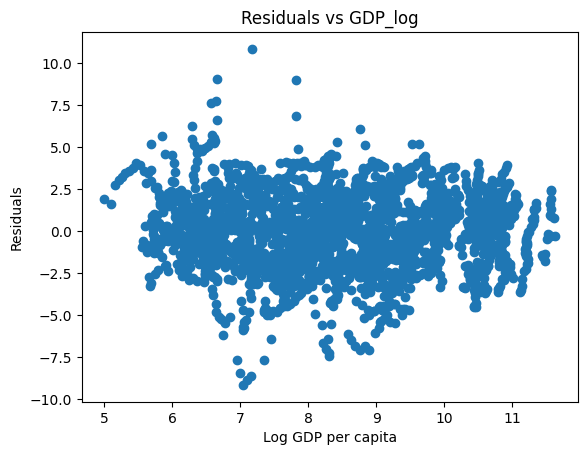

In [26]:
plt.scatter(life_expectancy['GDP_log'],lm_pooled.fit().resid)
plt.title('Residuals vs GDP_log')
plt.xlabel('Log GDP per capita')
plt.ylabel('Residuals');

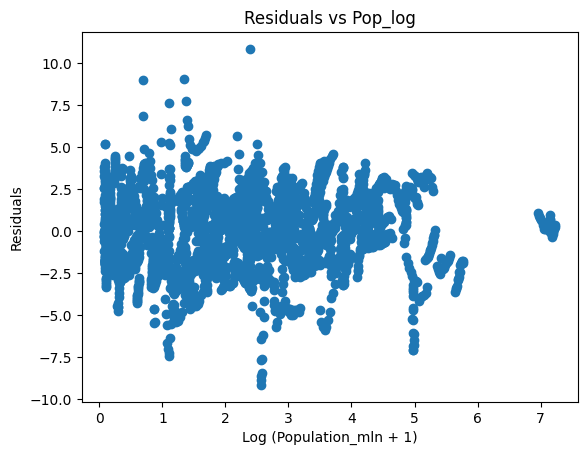

In [27]:
plt.scatter(life_expectancy['Pop_log'],lm_pooled.fit().resid)
plt.title('Residuals vs Pop_log')
plt.xlabel('Log (Population_mln + 1)')
plt.ylabel('Residuals');

<br/> We observe that the residuals are fairly normal. However, we notice some heteroscedasticity in the residuals (see the residulas vs. **Economy_Status** plot). Consequently, the standard errors might be undersetimated. 

The last thing we will check that is often investigated is the influence of individual observations on the fit, measured usually in terms of Cook's distance.

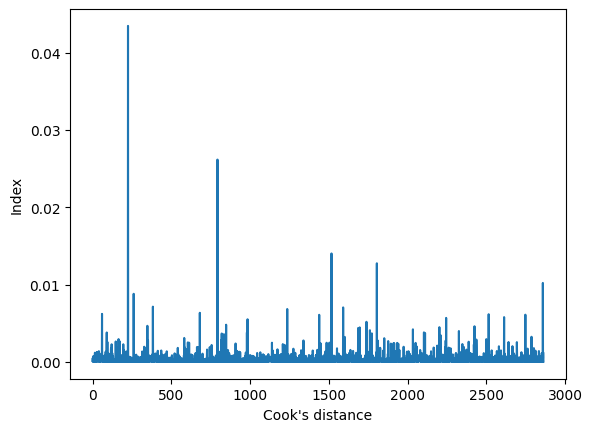

In [28]:
infl = lm_pooled.fit().get_influence()
sm_fr = infl.summary_frame()
plt.plot(sm_fr['cooks_d'])
plt.xlabel("Cook's distance")
plt.ylabel('Index');

<br/> We are primarily interested in observations that attained comparably large Cook's distances. Let us repeat the model fit, removing all observations with Cook's distance exceeding a given threshold. 

In [29]:
lm_pooled_red = smf.ols(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths', data=life_expectancy.loc[sm_fr['cooks_d'] < 0.005])

print(lm_pooled_red.fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:57:30   Log-Likelihood:                -6173.6
No. Observations:                2846   AIC:                         1.240e+04
Df Residuals:                    2822   BIC:                         1.254e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<br/> We observe that the fit did not dramatically change and thus, we keep all observations in the model.

### Dealing with Heteroskedasticity <a class="anchor" id="heteroskedasticity"></a>

A straightforward way of dealing with heteroskedasticity is to recompute the standard errors using some heteroskedasticity-consistent estimator of the covariance matrix, such as HC0 (Eicker–Huber–White) and HC3 (MacKinnon-White); HC3 is the default in the *vcovHC* function in R due to simulation experiments from [[3](#3)]. We should note that this approach uses the fact that the original coefficient estimates are consistent even though the covariance structure is misspecified.  The updated standard error estimates are as follows.

In [30]:
hc_errors = pd.concat([lm_pooled.fit().bse, lm_pooled.fit(cov_type='HC0').bse, lm_pooled.fit(cov_type='HC3').bse], axis=1)
hc_errors = hc_errors.rename(columns={0: 'se', 1: 'HC0', 2: 'HC3'})
hc_errors

,se,HC0,HC3
Intercept,1.197851,1.337962,1.357047
Economy_status[T.Developing],0.259204,0.242694,0.245586
Region[T.Asia],0.180943,0.203073,0.206048
Region[T.Central America and Caribbean],0.196767,0.223931,0.227564
Region[T.European Union],0.292840,0.282591,0.286643
Region[T.Middle East],0.226081,0.224780,0.227035
Region[T.North America],0.399422,0.395753,0.404200
Region[T.Oceania],0.243685,0.294050,0.298285
Region[T.Rest of Europe],0.233674,0.262376,0.265706
Region[T.South America],0.223668,0.216543,0.219646


<br/> We observe that some standard errors are slightly larger. We can also quite easily recompute the P-values of the significance tests.

In [31]:
print(lm_pooled.fit(cov_type='HC3').summary()) 

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2079.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:57:30   Log-Likelihood:                -6308.4
No. Observations:                2864   AIC:                         1.266e+04
Df Residuals:                    2840   BIC:                         1.281e+04
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<br/> An alternative to using heteroskedasticity-consistent errors is the nonparametric bootstrap (sometimes referred to as a *pairs* bootstrap), in which we resample the original dataset [[2](#2)]. Then, we simply refit the model using these new datasets. We can then obtain the confidence intervals from the coefficient resamples. We will compute simple percentile-based confidence intervals, which seem to work fairly well when the distribution of the bootstraped statistic is symmetrical and centered on the observed statistic, i.e, unbiased [[4](#4)].

In [32]:
# nonparametric bootstrap
np.random.seed(123)
nb = 1000
boot_coef1 = np.zeros([nb,len(lm_pooled.fit().params)])

for i in range(nb):
    rand_ind = np.random.choice(range(len(life_expectancy)), size=len(life_expectancy), replace=True)
    life_expectancy_new = pd.DataFrame(life_expectancy.loc[x] for x in rand_ind)
    lm_pooled_new = smf.ols(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                            Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                            Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                            Infant_deaths + Child_deaths', data=life_expectancy_new)
    boot_coef1[i] = lm_pooled_new.fit().params

# percentile-based CI
pd.DataFrame(boot_coef1, columns=list(lm_pooled_new.fit().params.index)).quantile([0.025,0.975],0)

,Intercept,Economy_status[T.Developing],Region[T.Asia],Region[T.Central America and Caribbean],Region[T.European Union],Region[T.Middle East],Region[T.North America],Region[T.Oceania],Region[T.Rest of Europe],Region[T.South America],...,Polio,Diphtheria,Incidents_HIV,GDP_log,Pop_log,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Infant_deaths,Child_deaths
0.025,63.865359,-4.976775,1.000854,1.989291,-1.147891,-0.237657,-0.492967,-1.226442,0.689046,1.668761,...,0.001890,-0.032431,-1.002469,1.328536,0.115170,-0.075541,-0.036107,-0.228246,-0.17700,-0.104481
0.975,69.149997,-4.038406,1.799886,2.876219,-0.036435,0.664566,1.155195,-0.070201,1.720022,2.564763,...,0.037298,0.002096,-0.861144,1.581857,0.252981,0.032745,0.073184,-0.114955,-0.15296,-0.066898


### Dealing with Autocorrelation <a class="anchor" id="autocorrelation"></a>

Both of the approaches above that helped us to deal with heteroskedasticity assume that the error terms are independent. However, our dataset consists of longitudinal data for 179 countries, and thus these observations might be significantly correlated. We can check our suspicion by plotting the residuals of our model for a given country against **Year**.

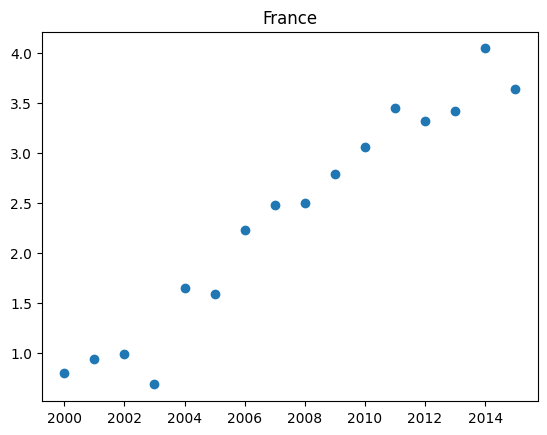

In [33]:
plt.scatter(life_expectancy[life_expectancy['Country'] == 'France']['Year'], \
            lm_pooled.fit().resid[life_expectancy['Country'] == 'France'])
plt.title('France');

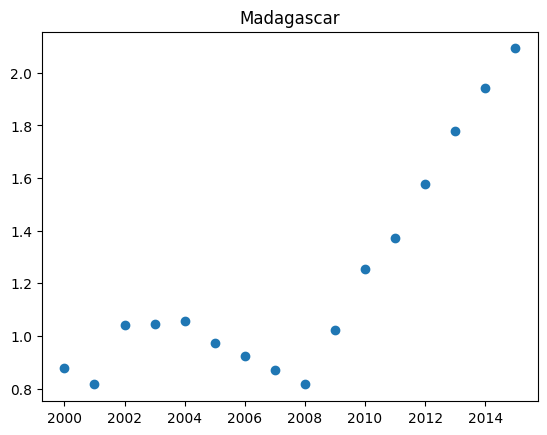

In [34]:
plt.scatter(life_expectancy[life_expectancy['Country'] == 'Madagascar']['Year'], \
            lm_pooled.fit().resid[life_expectancy['Country'] == 'Madagascar'])
plt.title('Madagascar');

<br/> These residuals are clearly strongly correlated. Hence, instead of heteroskedasticity-consistent standard errors, we should use cluster-robust standard errors. Our clusters consist of observations from the same country.

In [35]:
cr_errors = pd.concat([lm_pooled.fit().bse, lm_pooled.fit(cov_type='HC0').bse, \
                       lm_pooled.fit(cov_type='HC3').bse, \
                       lm_pooled.fit(cov_type='cluster',cov_kwds = {'groups':life_expectancy['Country']}).bse], axis=1)
cr_errors = cr_errors.rename(columns={0: 'se', 1: 'HC0', 2: 'HC3', 3: 'CR'})
cr_errors

,se,HC0,HC3,CR
Intercept,1.197851,1.337962,1.357047,4.313011
Economy_status[T.Developing],0.259204,0.242694,0.245586,0.861204
Region[T.Asia],0.180943,0.203073,0.206048,0.675859
Region[T.Central America and Caribbean],0.196767,0.223931,0.227564,0.690555
Region[T.European Union],0.292840,0.282591,0.286643,0.940909
Region[T.Middle East],0.226081,0.224780,0.227035,0.790664
Region[T.North America],0.399422,0.395753,0.404200,1.451847
Region[T.Oceania],0.243685,0.294050,0.298285,1.059227
Region[T.Rest of Europe],0.233674,0.262376,0.265706,0.900565
Region[T.South America],0.223668,0.216543,0.219646,0.710864


<br/> We immediately notice that the cluster-robust standard errors are much larger. Indeed, many variables are no longer statistically significant. I should note here that I did not found which type of cluster-robust errors are computed. Still, comparing the results with R suggests they are CR0 or CR1 (definitely not CR2, which is a shame since these are recommended based on simulation experiments [[5]](#5)).

In [36]:
print(lm_pooled.fit(cov_type='cluster',cov_kwds = {'groups':life_expectancy['Country']}).summary()) 

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     215.6
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          3.62e-117
Time:                        20:00:40   Log-Likelihood:                -6308.4
No. Observations:                2864   AIC:                         1.266e+04
Df Residuals:                    2840   BIC:                         1.281e+04
Df Model:                          23                                         
Covariance Type:              cluster                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<br/> Alternatively, we can use a bootstrap. However, we must use a pairs cluster bootstrap [[2](#2)] instead. In a pairs cluster bootstrap, we resample the entire clusters (in our case, time series for each country), preserving the correlation structure in the resampled data.

In [37]:
# pairs cluster bootstrap
np.random.seed(123)
nb = 1000
boot_coef2 = pd.DataFrame(index=range(nb),columns=list(lm_pooled.fit().params.index))

np.zeros([nb,len(lm_pooled.fit().params)])

countries = life_expectancy['Country'].unique()

for i in range(nb):
    rand_ind_country = np.random.choice(range(len(countries)), size=len(life_expectancy), replace=True)
    rand_ind = []
    for j in range(len(countries)):
        rand_ind.append(np.nonzero(life_expectancy['Country'] == countries[rand_ind_country[j]]))
    rand_ind = np.concatenate(rand_ind, axis=1)[0]

    life_expectancy_new = pd.DataFrame(life_expectancy.loc[x] for x in rand_ind)
    lm_pooled_new = smf.ols(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                            Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                            Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                            Infant_deaths + Child_deaths', data=life_expectancy_new)                   
    boot_coef2.loc[i,lm_pooled_new.fit().params.to_frame().index] = lm_pooled_new.fit().params

pd.DataFrame(boot_coef2, columns=list(lm_pooled.fit().params.index)).quantile([0.025,0.975],0).T

,0.025,0.975
Intercept,56.862094,75.694882
Economy_status[T.Developing],-6.453177,-2.686066
Region[T.Asia],-0.167937,2.683324
Region[T.Central America and Caribbean],0.908531,3.721229
Region[T.European Union],-2.738943,1.4206
Region[T.Middle East],-1.442978,1.815811
Region[T.North America],-3.547185,2.939132
Region[T.Oceania],-3.077949,1.401135
Region[T.Rest of Europe],-0.736395,3.198463
Region[T.South America],0.586869,3.563425


<br/> We observe that the results of the pair cluster bootstrap and the cluster robust standard errors are very similar.

## Fixed and Random Effects Models <a class="anchor" id="fixed-and-random"></a>

This linear model we constructed is in the context of panel data models called *pooled* because it stacks the data for all individuals and time instants together. This model is consistent provided there is no unobserved heterogeneity in the data that is *correlated* with the predictors in the model (i.e., there is no omitted variable bias). We can alleviate some of this potential bias by considering so-called *fixed effects*.

We first consider time fixed effects, i.e., effects corresponding to unobservables that change in time but are independent of individual countries. From a technical standpoint, we can simply include factor variables corresponding to the variable **Year** to the model. Again, we have to use  cluster-robust standard errors for the coefficients. 

In [38]:
life_expectancy_fe = life_expectancy.copy()
life_expectancy_fe['Year_factor'] = life_expectancy_fe['Year'].astype(object)

# time fixed effects model
lm_tfe = smf.ols(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor', data=life_expectancy_fe)
                    
print(lm_tfe.fit(cov_type='cluster',cov_kwds = {'groups':life_expectancy_fe['Country']}).summary()) 

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          2.18e-116
Time:                        20:04:17   Log-Likelihood:                -6269.3
No. Observations:                2864   AIC:                         1.262e+04
Df Residuals:                    2825   BIC:                         1.285e+04
Df Model:                          38                                         
Covariance Type:              cluster                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<br/> The **Year** fixed effects seem to be significant. We can formally test this using a cluster-robust Wald test.

In [39]:
hypothesis_year = '(Year_factor[T.2001] = 0,Year_factor[T.2002] = 0,Year_factor[T.2003] = 0,\
Year_factor[T.2004] = 0,Year_factor[T.2005] = 0,Year_factor[T.2006] = 0,Year_factor[T.2007] = 0,\
Year_factor[T.2008] = 0,Year_factor[T.2009] = 0,Year_factor[T.2010] = 0,Year_factor[T.2011] = 0,\
Year_factor[T.2012] = 0,Year_factor[T.2013] = 0,Year_factor[T.2014] = 0,Year_factor[T.2015] = 0)' 

lm_tfe.fit(cov_type='cluster',cov_kwds = {'groups':life_expectancy_fe['Country']}).wald_test(hypothesis_year,scalar = True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=65.32738731648188, p-value=2.9938472820267525e-08, df_denom=15>

<br/> The **Year** fixed effects are clearly significant, indicating that there was an unmodeled trend in the pooled model.

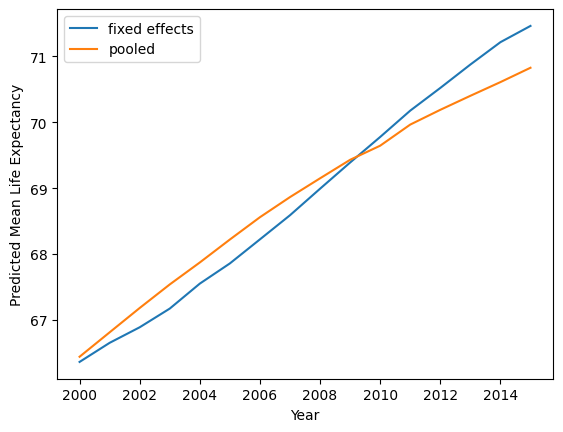

In [40]:
life_expectancy_fe['pooled_fit'] = lm_pooled.fit().fittedvalues
life_expectancy_fe['tfe_fit'] = lm_tfe.fit().fittedvalues

plt.plot([*range(2000,2016)], life_expectancy_fe[['Year','tfe_fit']].groupby(['Year']).mean(), label="fixed effects")
plt.plot([*range(2000,2016)], life_expectancy_fe[['Year','pooled_fit']].groupby(['Year']).mean(), label="pooled")
plt.xlabel('Year')
plt.ylabel('Predicted Mean Life Expectancy')
plt.legend();

<br/> We observe that the pooled model seems to slightly overestimate the life expectancy for earlier years and underestimate the life expectancy for the latter years. We should note that the predicted mean **Life_expectancy** for the time fixed effects model per year is the observed mean **Life_expectancy** per year due to how linear regression fits the data. 

The second type of effects that could be considered in the model are effects corresponding to individual countries. These effects model unobservables that are specific to each country but constant over time. Again, from a technical standpoint, individual fixed effects can be simply modeled as factor variables corresponding to the variable **Country**.

In [41]:
# individual & time fixed effects model

lm_itfe = smf.ols(formula='Life_expectancy ~  Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor + Country', data=life_expectancy_fe)
                    
                    
print(lm_itfe.fit(cov_type='cluster',cov_kwds = {'groups':life_expectancy_fe['Country']}).summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          8.51e-110
Time:                        20:04:17   Log-Likelihood:                -3157.5
No. Observations:                2864   AIC:                             6731.
Df Residuals:                    2656   BIC:                             7971.
Df Model:                         207                                         
Covariance Type:              cluster                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\Users\elini\Documents\pythonenv\ninecircles1\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 207, but rank is 29
  warnings.warn('covariance of constraints does not have full '


<br/> There are several observations to make. First, effects of covariates that do not change in time for countries (**Economy_status** and **Region**) are no longer estimable; they are a part of the individual fixed effects. Second, we got a warning about the computation of the covariance matrix. I recomputed the cluster-robust standard errors in R using the *clubSandwich* package (CR2 errors with the Satterthwaite DOF correction for P-value computation) and I obtained a very similar result, with no warnings. Hence, the results should be fine. We should note that we could again use a pairs cluster bootstrap rather than computing cluster-robust standard errors. Third, after all adjustments, only **Incidents_HIV**, **BMI**, and **Infant_deaths** remain significant.

The fixed effects model is the most robust. We addressed heteroscedasticity and within-cluster correlations. We also reduced the omitted variable bias to effects that vary both in time and countries (we cannot fit these fixed effects since this would lead to a full model with no free degrees of freedom). The disadvantage is that some effects are no longer estimable, and we used many degrees of freedom to estimate the fixed effects; consequently, we lost a lot of power to assess the significance of the effects of interest. 

Consequently, we will consider an alternative model; a *random effects* model. In a random effects model, individual effects are assumed to be normal random variables with a constant mean and variance. Now, the key assumption of the random effects model is that these individual effects are *not* correlated with other covariates; i.e., the random effects model does not help account for unobserved heterogeneity that is correlated with the predictors in the model. Still, the random effects model might be more  *efficient*.

The pooled model is an ordinary linear regression model; thus, to be efficient, the errors need to be independent. By introducing random effects, a correlation structure arises between observations for the same individual. This structure is equicorrelated, i.e., the correlation of the composite error (random effect + error) between two distinct observations for the same individual is constant. This may not be as realistic in particular for a long time series (we expect the correlation between observations to reduce over time). However, it is still more realistic than the assumption of the pooled model that this correlation is always zero. So overall, the random effects model should provide more accurate estimates than the pooled model, provided that the exogeneity assumption (individual effects are uncorrelated with the rest of the predictors) holds [[2](#2)].


In [42]:
# random effects model

lm_tre = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor', groups=life_expectancy_fe['Country'], \
                    data=life_expectancy_fe)

print(lm_tre.fit().summary())

                       Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        Life_expectancy
No. Observations:         2864           Method:                    REML           
No. Groups:               179            Scale:                     0.5787         
Min. group size:          16             Log-Likelihood:            -3819.8226     
Max. group size:          16             Converged:                 Yes            
Mean group size:          16.0                                                     
-----------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                               79.911    2.749  29.066 0.000 74.522 85.299
Economy_status[T.Developing]            -5.836    1.142  -5.112 0.000 -8.074 -3.599
Region[T.Asia] 

<br/> The variable *Group Var* is the estimate of the variance of individual random effects. The *scale* is the remaining *idiosyncratic* error. Predictions of random effect for particular countries are as follows.

In [43]:
pd.DataFrame(lm_tre.fit().random_effects)

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
Group,-3.24073,4.003245,8.389968,-2.469908,0.155538,1.223176,1.626029,2.040788,1.302929,2.251114,...,-0.507713,-2.361985,2.014463,0.792001,-0.385986,-0.010181,2.362288,-5.265548,-2.688791,-5.827661


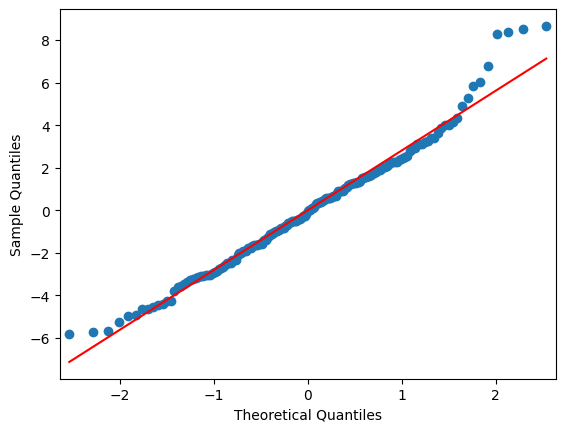

In [44]:
sm.qqplot((pd.DataFrame(lm_tre.fit().random_effects)).iloc[0,:], line='s');

<br/> We observe that the random effects are approximately normal as assumed. However, the random effects model is consistent only under the exogeneity assumption (individual random effects are uncorrelated with the rest of the predictors). We can test the consistency of the random effects model as follows. First, we create a dataframe with cluster means of the time-varying predictors.

In [45]:
alcohol_cent = life_expectancy[['Alcohol_consumption','Country']].groupby('Country').mean().rename(columns={'Alcohol_consumption': 'Alcohol_consumption_cent'})
hepatitis_cent = life_expectancy[['Hepatitis_B','Country']].groupby('Country').mean().rename(columns={'Hepatitis_B': 'Hepatitis_B_cent'})
measles_cent = life_expectancy[['Measles','Country']].groupby('Country').mean().rename(columns={'Measles': 'Measles_cent'})
bmi_cent = life_expectancy[['BMI','Country']].groupby('Country').mean().rename(columns={'BMI': 'BMI_cent'})
polio_cent = life_expectancy[['Polio','Country']].groupby('Country').mean().rename(columns={'Polio': 'Polio_cent'})
diphteria_cent = life_expectancy[['Diphtheria','Country']].groupby('Country').mean().rename(columns={'Diphtheria': 'Diphtheria_cent'})
hiv_cent = life_expectancy[['Incidents_HIV','Country']].groupby('Country').mean().rename(columns={'Incidents_HIV': 'Incidents_HIV_cent'})
gdp_log_cent = life_expectancy[['GDP_log','Country']].groupby('Country').mean().rename(columns={'GDP_log': 'GDP_log_cent'})
pop_log_cent = life_expectancy[['Pop_log','Country']].groupby('Country').mean().rename(columns={'Pop_log': 'Pop_log_cent'})
thinness19_cent = life_expectancy[['Thinness_ten_nineteen_years','Country']].groupby('Country').mean().rename(columns={'Thinness_ten_nineteen_years': 'Thinness_ten_nineteen_years_cent'})
thinness9_cent = life_expectancy[['Thinness_five_nine_years','Country']].groupby('Country').mean().rename(columns={'Thinness_five_nine_years': 'Thinness_five_nine_years_cent'})
schooling_cent = life_expectancy[['Schooling','Country']].groupby('Country').mean().rename(columns={'Schooling': 'Schooling_cent'})
infant_d_cent = life_expectancy[['Infant_deaths','Country']].groupby('Country').mean().rename(columns={'Infant_deaths': 'Infant_deaths_cent'})
child_d_cent = life_expectancy[['Child_deaths','Country']].groupby('Country').mean().rename(columns={'Child_deaths': 'Child_deaths_cent'})

life_expectancy_cent = life_expectancy_fe.merge(alcohol_cent,on = 'Country').merge(hepatitis_cent,on = 'Country').merge(measles_cent,on = 'Country').merge(bmi_cent,on = 'Country')\
.merge(polio_cent,on = 'Country').merge(diphteria_cent,on = 'Country').merge(hiv_cent,on = 'Country').merge(gdp_log_cent,on = 'Country')\
.merge(pop_log_cent,on = 'Country').merge(thinness19_cent,on = 'Country').merge(thinness9_cent,on = 'Country').merge(schooling_cent,on = 'Country')\
.merge(infant_d_cent,on = 'Country').merge(child_d_cent,on = 'Country');

<br/> Then, we fit a new random effects model with cluster means as additional predictors. Provided that the exogeneity assumption holds, these additional predictors hould be insignificant in the model [[6](#6)].

In [46]:
lm_cr = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                    Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                    Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                    Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                    groups=life_expectancy_cent['Country'], \
                    data=life_expectancy_cent)

print(lm_cr.fit().summary())    

                       Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        Life_expectancy
No. Observations:         2864           Method:                    REML           
No. Groups:               179            Scale:                     0.5726         
Min. group size:          16             Log-Likelihood:            -3768.6970     
Max. group size:          16             Converged:                 Yes            
Mean group size:          16.0                                                     
-----------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                               68.489    5.127  13.358 0.000 58.440 78.538
Economy_status[T.Developing]            -4.737    1.003  -4.722 0.000 -6.703 -2.771
Region[T.Asia] 

<br/> We will test the significane via a Wald test. 

In [47]:
hypothesis_cent = '(Alcohol_consumption_cent = 0,Hepatitis_B_cent = 0, Measles_cent = 0,\
BMI_cent = 0, Polio_cent = 0, Diphtheria_cent = 0, Incidents_HIV_cent = 0,\
GDP_log_cent = 0, Pop_log_cent = 0, Thinness_ten_nineteen_years_cent = 0, Thinness_five_nine_years_cent = 0,\
Schooling_cent = 0, Infant_deaths_cent = 0, Child_deaths_cent = 0)' 
    
lm_cr.fit().wald_test(hypothesis_cent, scalar = True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=188.797228910405, p-value=1.0564731311583879e-32, df_denom=14>

<br/> We observe that the cluster means are strongly significant, and thus, the random effects model should not be used. We should note that a simple Wald test (in the context of mixed effects models) is not generally recommended. We should use other tests (e.g., the likelihood ratio test or the Wald test with DOF corrections [[7](#7)]), but since we have almost 200 clusters and a simple random effects structure, the Wald test should perform just fine.

The last model we fitted to test the consistency of the random effects model is called *correlated random effects (CRE) model* . As we have observed, the CRE model is an extension of the random effects model that attempts to address unobserved endogeneity via cluster-mean predictors. A nice property of the CRE model is that estimates of the time-varying predictors are *identical* to the fixed-effects estimates. Hence, the CRE model provides a useful alternative to the fixed effects model that keeps the time-invariant predictors in the model [[6](#6), [8](#8)]. 

The CRE model will be our model of choice for modelling the dataset. As the last step of this section, let us evaluate the confidence intervals for our predictors of interest. As we have mentioned, the Wald standard errors provided by *mixedlm* are not ideal; hence, let us perform another cluster pairs bootstrap to obtain more accurate confidence intervals (you can check my R solution, First Circle, Part Two, for a bunch more options).


In [48]:
# pairs cluster bootstrap

np.random.seed(123)
nb = 1000
boot_coef3 = pd.DataFrame(index=range(nb),columns=list(lm_cr.fit().params.index))

np.zeros([nb,len(lm_cr.fit().params)])

countries = life_expectancy_cent['Country'].unique()

for i in range(nb):
    rand_ind_country = np.random.choice(range(len(countries)), size=len(life_expectancy_cent), replace=True)
    rand_ind = []
    for j in range(len(countries)):
        rand_ind.append(np.nonzero(life_expectancy_cent['Country'] == countries[rand_ind_country[j]]))
    rand_ind = np.concatenate(rand_ind, axis=1)[0]

    life_expectancy_cent_new = pd.DataFrame(life_expectancy_cent.loc[x] for x in rand_ind)
    lm_cr_new = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                    Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                    Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                    Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                    groups=life_expectancy_cent_new['Country'], \
                    data=life_expectancy_cent_new)                   
    boot_coef3.loc[i,lm_cr_new.fit().params.to_frame().index] = lm_cr_new.fit().params

pd.DataFrame(boot_coef3, columns=list(lm_pooled.fit().params.index)).quantile([0.025,0.975],0).T

,0.025,0.975
Intercept,-533.892089,-310.787167
Economy_status[T.Developing],-6.534925,-3.092763
Region[T.Asia],-0.44914,2.321589
Region[T.Central America and Caribbean],0.704402,3.429393
Region[T.European Union],-3.299432,0.765616
Region[T.Middle East],-1.328602,1.545519
Region[T.North America],-3.705681,2.635035
Region[T.Oceania],-3.32199,1.025621
Region[T.Rest of Europe],-0.965183,2.639528
Region[T.South America],0.311063,3.080674


<br/> We observe that the results are similar to the fixed effects model. **Economy_status**,**Incidents_HIV**, **BMI**, **Infant_deaths**, and **Child_deaths** seem to be significant. We should note that the significance of **Economy_status** could not be determined in the fixed effects model. Let us check the model.

Text(0.5, 1.0, 'Residuals Q-Q plot')

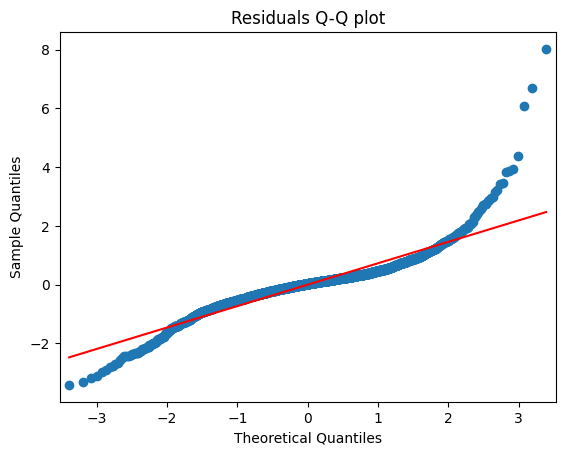

In [49]:
# residuals
sm.qqplot(lm_cr.fit().resid, line='s');
plt.title('Residuals Q-Q plot')

Text(0, 0.5, 'Frequency')

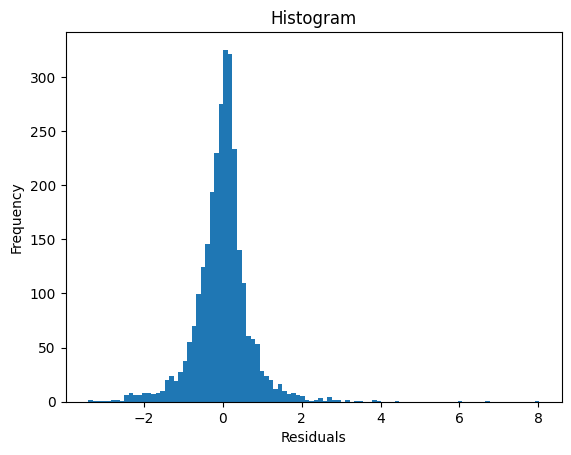

In [50]:
plt.hist(lm_cr.fit().resid, bins=100);
plt.title('Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Random effects Q-Q plot')

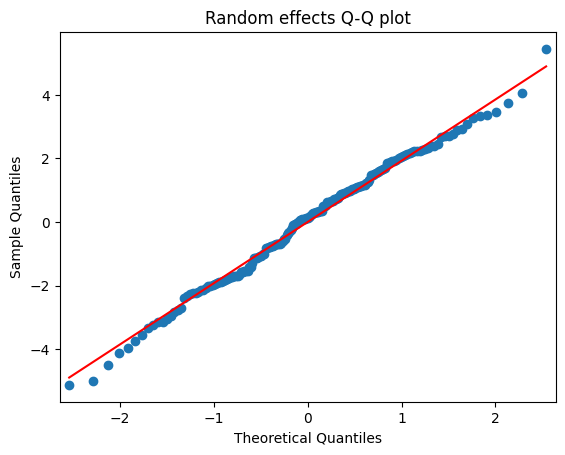

In [51]:
# random effects
sm.qqplot((pd.DataFrame(lm_cr.fit().random_effects)).iloc[0,:], line='s');
plt.title('Random effects Q-Q plot')

<br/> Let us also check plots of residuals against the fitted values and the predictors.

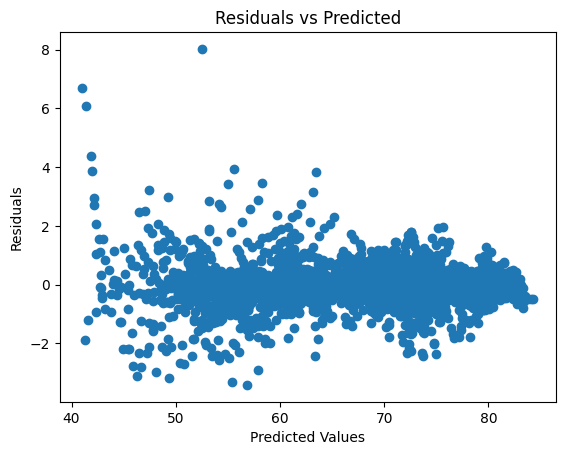

In [52]:
plt.scatter(lm_cr.fit().fittedvalues, lm_cr.fit().resid)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

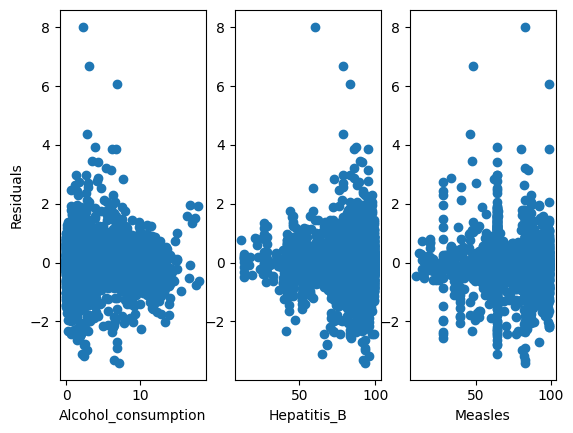

In [53]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(life_expectancy['Alcohol_consumption'], lm_cr.fit().resid)
axs[0].set_xlabel('Alcohol_consumption')
axs[0].set_ylabel('Residuals')
axs[1].scatter(life_expectancy['Hepatitis_B'], lm_cr.fit().resid)
axs[1].set_xlabel('Hepatitis_B')
axs[2].scatter(life_expectancy['Measles'], lm_cr.fit().resid)
axs[2].set_xlabel('Measles');

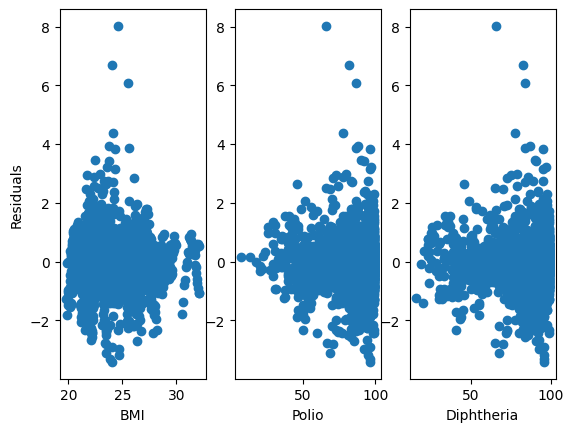

In [54]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(life_expectancy['BMI'], lm_cr.fit().resid)
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Residuals')
axs[1].scatter(life_expectancy['Polio'], lm_cr.fit().resid)
axs[1].set_xlabel('Polio')
axs[2].scatter(life_expectancy['Diphtheria'], lm_cr.fit().resid)
axs[2].set_xlabel('Diphtheria');

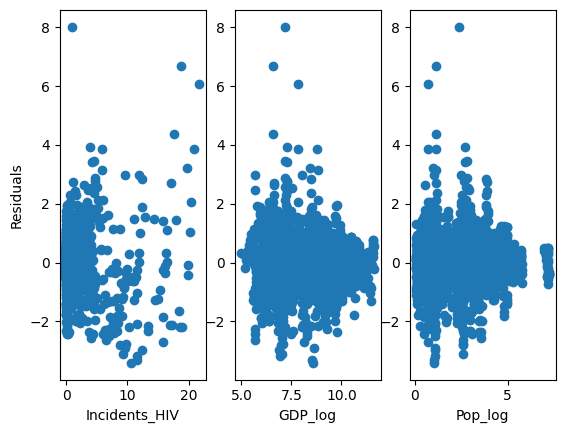

In [55]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(life_expectancy['Incidents_HIV'], lm_cr.fit().resid)
axs[0].set_xlabel('Incidents_HIV')
axs[0].set_ylabel('Residuals')
axs[1].scatter(life_expectancy['GDP_log'], lm_cr.fit().resid)
axs[1].set_xlabel('GDP_log')
axs[2].scatter(life_expectancy['Pop_log'], lm_cr.fit().resid)
axs[2].set_xlabel('Pop_log');

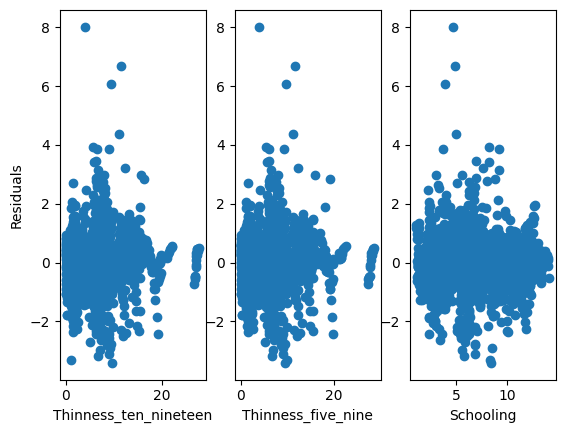

In [56]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(life_expectancy['Thinness_ten_nineteen_years'], lm_cr.fit().resid)
axs[0].set_xlabel('Thinness_ten_nineteen')
axs[0].set_ylabel('Residuals')
axs[1].scatter(life_expectancy['Thinness_five_nine_years'], lm_cr.fit().resid)
axs[1].set_xlabel('Thinness_five_nine')
axs[2].scatter(life_expectancy['Schooling'], lm_cr.fit().resid)
axs[2].set_xlabel('Schooling');

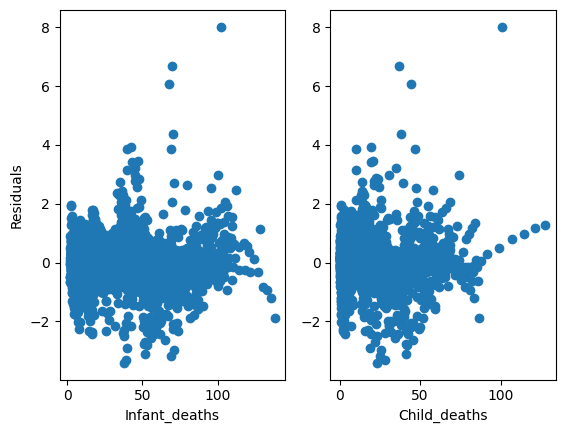

In [57]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(life_expectancy['Infant_deaths'], lm_cr.fit().resid)
axs[0].set_xlabel('Infant_deaths')
axs[0].set_ylabel('Residuals')
axs[1].scatter(life_expectancy['Child_deaths'], lm_cr.fit().resid)
axs[1].set_xlabel('Child_deaths');

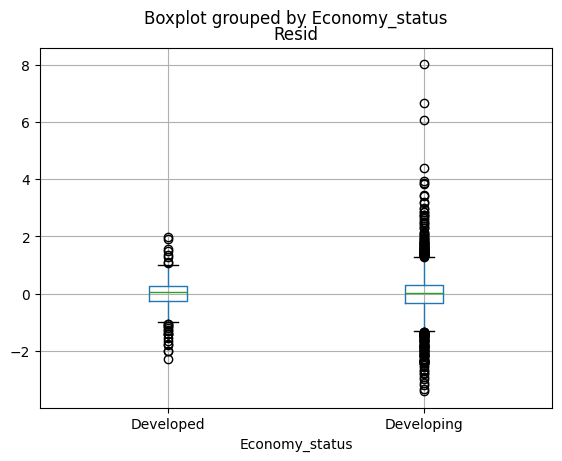

In [58]:
boxplotresid_dataframe2 = pd.DataFrame({'Resid':lm_cr.fit().resid, \
                                       'Economy_status':life_expectancy['Economy_status'],
                                       'Region':life_expectancy['Region'],})
boxplotresid_dataframe2.boxplot('Resid',by='Economy_status');

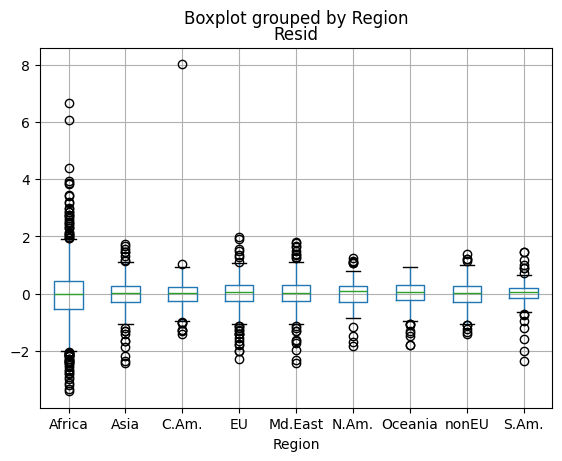

In [59]:
boxplotresid_dataframe2.boxplot('Resid',by='Region')
plt.xticks([1,2,3,4,5,6,7,8,9], ['Africa','Asia','C.Am.','EU','Md.East','N.Am.','Oceania','nonEU','S.Am.']);

<br/> We observe that the distribution of residuals is fairly symmetric but not normal. We also observe some heteroskedasticity wrt. some predictors. The distribution of the random effects is close to normal as assumed. Overall, it seems that the model fits the data reasonably well.

## Confidence Intervals for Predictions <a class="anchor" id="predictions"></a>

Let us assume our CRE model. We will demonstrate how to compute confidence intervals for predictions. Let us take the dataset without, say, France. We will fit the CRE model on the dataset excluding France, then use it to predict France's life expectancy. We should note that we sorted the dataset by Country and Year to simplify further implementations.

In [71]:
life_expectancy_sort = life_expectancy_cent.sort_values(axis = 0, by = ['Country','Year']).reset_index(drop=True) # sort by Country and Year
life_expectancy_nofrance = life_expectancy_sort.loc[life_expectancy_sort['Country'] != 'France'].reset_index(drop=True)
life_expectancy_france = life_expectancy_sort.loc[life_expectancy_sort['Country'] == 'France'].reset_index(drop=True)


lm_no_france = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                    Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                    Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                    Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                    Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                    Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                    Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                    groups=life_expectancy_nofrance['Country'], \
                    data=life_expectancy_nofrance)
life_expectancy_france_new = life_expectancy_nofrance.copy()  

ref_std = np.sqrt(lm_no_france.fit().cov_re.squeeze()) # std. deviation of random effects
res_std = np.sqrt(lm_no_france.fit().scale.squeeze()) # std. deviation of the idiosyncratic error
pred_no_france = lm_no_france.fit().predict() # fitted values
resid_no_france = lm_no_france.fit().resid; # residuals

<br/> Again, it is recommended for (especially more complicated) random effects models to use a bootstrap [[9](#9)]. First, we consider a *parametric* bootstrap. When using a parametric bootstrap, we assume the model is correctly specified, and we use the learned model to simulate new datasets to obtain the sampling distributions of our predictions. 

In [72]:
# parametric bootstrap    
np.random.seed(123)
nb = 500  
boot_predict1 = pd.DataFrame(index=range(nb),columns=range(2000,2016))
for i in range(nb):
    ref_new = np.random.normal(0,ref_std,178).repeat(16) # generate new random effects
    resid_new = np.random.normal(0,res_std,2848) # generate new residuals
    life_expectancy_france_new['Life_expectancy'] = pred_no_france + ref_new + resid_new # new dataset
    lm_no_france_new = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                        Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                        Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                        Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                        Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                        Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                        Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                        groups=life_expectancy_france_new['Country'], \
                        data=life_expectancy_france_new)

    boot_predict1.iloc[i,:] = lm_no_france_new.fit().predict(life_expectancy_france) # new prediction for France
    
boot_predict1.quantile([0.025,0.975],0)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.025,74.937424,74.866637,75.054829,75.14155,75.384549,75.543906,75.710482,75.98133,76.313554,76.613413,76.928688,77.169232,77.427695,77.761395,78.043451,78.206465
0.975,79.803966,79.825484,79.913547,80.060316,80.214831,80.366957,80.610478,80.85129,81.110378,81.452346,81.727304,82.011223,82.260274,82.507808,82.833185,83.047327


<br/> An alternative to a parametric bootstrap is a semi-parametric bootstrap, a residual bootstrap. In a residual bootstrap, we resample the observed residuals rather than generating new ones from the distribution assumed by the model. This makes the residual bootstrap more robust to model misspecifications. Since we are dealing with the panel data, we can use a residual cluster bootstrap to account for the fact the residuals might be correlated within clusters.

In [73]:
# residual cluster bootstrap
np.random.seed(123)
nb = 500   
boot_predict2 = pd.DataFrame(index=range(nb),columns=range(2000,2016))
for i in range(nb):
    ref_new = np.random.normal(0,ref_std,178).repeat(16) # generate new random effects
    resid_new = resid_no_france.iloc[np.random.choice([*range(0,len(life_expectancy_nofrance),16)],178, \
                                                      replace=True).repeat(16) + [*range(16)]*178] # resample the residuals by clusters
    life_expectancy_france_new['Life_expectancy'] = pred_no_france + ref_new + np.array(resid_new)
    lm_no_france_new = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                        Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                        Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                        Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                        Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                        Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                        Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                        groups=life_expectancy_france_new['Country'], \
                        data=life_expectancy_france_new)

    boot_predict2.iloc[i,:] = lm_no_france_new.fit().predict(life_expectancy_france)
    
boot_predict2.quantile([0.025,0.975],0)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.025,74.813012,74.86468,74.984927,75.119378,75.27635,75.420221,75.657149,75.878908,76.183769,76.472448,76.709136,76.910822,77.28145,77.56459,77.832578,77.987525
0.975,80.190403,80.228524,80.280435,80.391743,80.546042,80.67143,80.906285,81.136983,81.431386,81.723534,82.01187,82.255327,82.645147,82.932145,83.138151,83.343009


<br/> The disadvantage of a residual bootstrap is that this approach is not robust to heteroskedasticity between clusters. Thus, we can consider another semi-parametric bootstrap: *wild bootstrap*. Instead of resampling the residuals themselves, the wild bootstrap rescales residuals with a random variable *v* such that $\mathrm{E} v = 0$ and $\mathrm{Var} v = 1$. Often, these weights are chosen simply as *-1* with a probability *0.5* and *1* with a probability *0.5*, the so-called Rademacher weights. This is why the bootstrap is termed wild, because it is kind of *wild* that such a bootstrap provides asymptotically valid results [[10](#10)].

In [74]:
# wild cluster bootstrap
np.random.seed(123)
nb = 500  
boot_predict3 = pd.DataFrame(index=range(nb),columns=range(2000,2016))
for i in range(nb):
    ref_new = np.random.normal(0,ref_std,178).repeat(16) # generate new random effects
    weights = (2*(np.random.uniform(0,1,178)).round(0)-1).repeat(16) # generate Rademacher weights
    resid_new = resid_no_france*weights # new residuals
    life_expectancy_france_new['Life_expectancy'] = pred_no_france + ref_new + np.array(resid_new)
    lm_no_france_new = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                        Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                        Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                        Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                        Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                        Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                        Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                        groups=life_expectancy_france_new['Country'], \
                        data=life_expectancy_france_new)

    boot_predict3.iloc[i,:] = lm_no_france_new.fit().predict(life_expectancy_france)
    
boot_predict3.quantile([0.025,0.975],0)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.025,74.805504,74.862603,74.94794,75.085087,75.284194,75.426095,75.687348,75.939474,76.219645,76.547666,76.818519,77.10099,77.437,77.715132,77.975164,78.140984
0.975,79.952222,79.986346,80.083948,80.196768,80.379966,80.524864,80.759834,80.985894,81.315383,81.57532,81.915153,82.164572,82.451934,82.734763,83.021727,83.230244


<br/> We can also use the pairs cluster bootstrap again.

In [76]:
# pairs cluster bootstrap
np.random.seed(123)
nb = 500   
boot_predict4 = pd.DataFrame(index=range(nb),columns=range(2000,2016))

for i in range(nb):
    life_expectancy_france_new = life_expectancy_nofrance.iloc[np.random.choice([*range(0,len(life_expectancy_nofrance),16)],178, \
                                                                                replace=True).repeat(16) + [*range(16)]*178]
    lm_no_france_new = smf.mixedlm(formula='Life_expectancy ~ Economy_status + Region + Alcohol_consumption + \
                        Hepatitis_B + Measles + BMI + Polio + Diphtheria + Incidents_HIV + GDP_log + \
                        Pop_log + Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + \
                        Infant_deaths + Child_deaths + Year_factor + Alcohol_consumption_cent + \
                        Hepatitis_B_cent + Measles_cent + BMI_cent + Polio_cent + Diphtheria_cent + \
                        Incidents_HIV_cent + GDP_log_cent + Pop_log_cent + Thinness_ten_nineteen_years_cent + \
                        Thinness_five_nine_years_cent + Schooling_cent + Infant_deaths_cent + Child_deaths_cent', \
                        groups=life_expectancy_france_new['Country'], \
                        data=life_expectancy_france_new)                   
    boot_predict4.iloc[i,:] = lm_no_france_new.fit().predict(life_expectancy_france)

boot_predict4.quantile([0.025,0.975],0)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.025,75.321853,75.387403,75.47449,75.580609,75.724866,75.869823,76.115125,76.350195,76.650709,76.90392,77.113962,77.333296,77.661413,77.927943,78.235045,78.431922
0.975,79.64143,79.643504,79.742485,79.899388,80.05894,80.213747,80.461798,80.683774,80.997395,81.281058,81.578592,81.870041,82.247879,82.509783,82.805414,83.011061


<br/> We observe that the results are fairly similar.

## Model Validation <a class="anchor" id="validation"></a>

As the final step of this notebook, we will validate our CRE model using 10-fold cross-validation. We will evaluate predictive performance using root mean squared error (RMSE) and calibration (slope of the linear regression of actual vs. predicted). 

For implementation, we need to create the model matrix manually. This allows us to account for the fact that, in some splits, levels of category variables may be missing, which messes up with the implementation of *predict* in Python.

In [65]:
# creating the model matrix manually
dummies = pd.get_dummies(life_expectancy_sort[['Economy_status','Region','Year_factor']]) # create dummies for factor variables
life_expectancy_cv = pd.concat([life_expectancy_sort,dummies],axis = 1)

model_matrix = life_expectancy_cv.iloc[:,[3,*range(6,13),*range(15,18),20,21,22,*range(24,39),*range(42,6)]].astype(float)
model_matrix = pd.concat([model_matrix,pd.DataFrame(np.ones([len(model_matrix),1]))],axis = 1) # model matrix
model_response = life_expectancy_cv['Life_expectancy'] # vector of responses

np.random.seed(123)
rep = 100
folds = 10
rmse_cv =  pd.DataFrame(index=range(rep*folds),columns = ['mse'])
calib_cv = pd.DataFrame(index=range(rep*folds),columns = ['mse'])

from sklearn.model_selection import KFold
kf = KFold(n_splits=10) # create folds

k = 0
for i in range(rep):
    idx_cv = np.random.choice([*range(0,len(life_expectancy_cv),16)],179, replace=False) # reshuffle the observations
    
    for j, (train_index, test_index) in enumerate(kf.split(idx_cv)):
        
        train_set = idx_cv[train_index].repeat(16) + [*range(16)]*len(train_index) # extract train set indeces
        test_set = idx_cv[test_index].repeat(16) + [*range(16)]*len(test_index) # extract test set indeces

        # train set
        model_matrix_cv = model_matrix.iloc[train_set] 
        model_response_cv = model_response.iloc[train_set]
        model_country = life_expectancy_cv['Country'][train_set]
        
        # test set
        test_matrix_cv = model_matrix.iloc[test_set]
        test_response_cv = model_response.iloc[test_set]

        # check that some factor levels are not missing, i.e., whether there is a zero column in the model matrix
        # if it is, remove this column from the model matrix and the test observations
        zero_index = np.where(~model_matrix_cv.any(axis=0))[0]
        test_matrix_cv = test_matrix_cv.drop(model_matrix_cv.columns[zero_index], axis=1)
        model_matrix_cv = model_matrix_cv.drop(model_matrix_cv.columns[zero_index], axis=1)
        
        # fit the model
        lm_cv = sm.regression.mixed_linear_model.MixedLM(endog = model_response_cv, exog = model_matrix_cv, groups=model_country)

        # evaluate the model
        rmse_cv.iloc[k] = np.sqrt(((lm_cv.fit().predict(test_matrix_cv) - test_response_cv)**2).mean())
        calib_cv.iloc[k] = sm.OLS(endog = lm_cv.fit().predict(test_matrix_cv), exog = test_response_cv).fit().params.iloc[0]
        
        k = k +1

<br/> We observe that the model is well-calibrated.

In [66]:
calib_cv.mean()

mse    0.999559
dtype: object

<br/> The cross-validated error is slightly larger than the error predicted by the model (random effects + idiosyncratic error).

In [67]:
rmse_cv.mean()

mse    2.368574
dtype: object

In [68]:
np.sqrt(np.sqrt(lm_cr.fit().cov_re.squeeze())**2 + np.sqrt(lm_cr.fit().scale.squeeze())**2)

2.2138458606021794

In [69]:
rmse_cv.mean()/np.sqrt(np.sqrt(lm_cr.fit().cov_re.squeeze())**2 + np.sqrt(lm_cr.fit().scale.squeeze())**2)

mse    1.069891
dtype: object

<br/> We observe that the performance decreased by about 10% which is overall quite reasonable. In this notebook, we will not go through commenting on the predictors that appeared important in the model. See First Circle Part Three, if you are interested.

## References <a class="anchor" id="references"></a>

<a id="1">[1]</a> WOOLDRIDGE, Jeffrey M. *Econometric analysis of cross section and panel data*. MIT press, 2010.

<a id="2">[2]</a> CAMERON, A. C. *Microeconometrics: methods and applications.* Cambridge University, 2005.

<a id="3">[3]</a> LONG, J. Scott; ERVIN, Laurie H. Using heteroscedasticity consistent standard errors in the linear regression model. *The American Statistician*, 2000, 54.3: 217-224.

<a id="4">[4]</a> HESTERBERG, Tim C. What teachers should know about the bootstrap: Resampling in the undergraduate statistics curriculum. *The american statistician*, 2015, 69.4: 371-386.

<a id="5">[5]</a> TYSZLER, Marcelo; PUSTEJOVSKY, James; TIPTON, Elizabeth. REG_SANDWICH: Stata module to compute cluster-robust (sandwich) variance estimators with small-sample corrections for linear regression. 2017.

<a id="6">[6]</a> ANTONAKIS, John; BASTARDOZ, Nicolas; RÖNKKÖ, Mikko. On ignoring the random effects assumption in multilevel models: Review, critique, and recommendations. *Organizational Research Methods*, 2021, 24.2: 443-483.

<a id="7">[7]</a> LUKE, Steven G. Evaluating significance in linear mixed-effects models in R. *Behavior research methods*, 2017, 49.4: 1494-1502.

<a id="8">[8]</a> MCNEISH, Daniel; KELLEY, Ken. Fixed effects models versus mixed effects models for clustered data: Reviewing the approaches, disentangling the differences, and making recommendations. *Psychological methods*, 2019, 24.1: 20.

<a id="9">[9]</a> FARAWAY, Julian J. Extending the linear model with R: generalized linear, mixed effects and nonparametric regression models. *Chapman and Hall/CRC*, 2016.

<a id="10">[10]</a> DJOGBENOU, Antoine A.; MACKINNON, James G.; NIELSEN, Morten Ørregaard. Asymptotic theory and wild bootstrap inference with clustered errors. *Journal of Econometrics*, 2019, 212.2: 393-412.
